# Work 3


After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/startup_funding.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
test3 = df.copy()

In [5]:
test3

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [6]:
#correcting the spelling in investors name ignoring undisclosed investors


test3['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test3['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [7]:
temp = test3['InvestorsName'].value_counts()
temp.index

Index(['', 'Ratan Tata', 'Indian Angel Network', 'Kalaari Capital',
       'Group of Angel Investors', 'Sequoia Capital', 'undisclosed investors',
       'Brand Capital', 'RoundGlass Partners', 'Undisclosed Investor',
       ...
       'Axilor Ventures, Parampara Early Stage Opportunities Fund & Others',
       'Ajay Data & undisclosed HNIs', 'Sanjay Sethi, Ravi Jaipuria & others',
       'Ankit Gupta, Puneet Motihar', 'KCL', 'Sandeep Aggarwal',
       'YourWeCan Ventures', 'Arun Chandra Mohan',
       'Sachin Bhatia, Rajesh Sawhney', 'Arun Chandra Mohan, Praveen Sinha'],
      dtype='object', length=1884)

In [8]:
#correcting major startup names

test3['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test3['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test3['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test3['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Olacabs", "Ola", inplace = True)
test3['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test3['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [9]:
temp2 = test3['StartupName'].value_counts()
temp2.index

Index(['Ola', 'Swiggy', 'Paytm', 'UrbanClap', 'Oyo', 'NoBroker', 'Jugnoo',
       'Flipkart', 'Medinfi', 'Voonik',
       ...
       'Freshee', 'Karma Healthcare', 'TicketNew', 'PriceRaja', 'Robosoft',
       'DriveU', 'EveningFlavors', 'Lavelle Networks', 'Rentickle',
       'AlmaConnect'],
      dtype='object', length=1993)

In [10]:
#filtering the na

test3.dropna(inplace = True, subset = ["InvestorsName", "StartupName"])
test3.reset_index(drop = True, inplace = True)

In [11]:
#function to create dictionary of investor name making investment to different startups
def Create(startup_name, Investor_name):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None: #no startup is still funded by this investor
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i] = li
            
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:  #no startup is still funded by this investor
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:         #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt


In [12]:
#making dictionary

dictionary = Create(test3['StartupName'], test3['InvestorsName'])

In [13]:
#build pandas dataframe

diff_invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

In [14]:
diff_invest = diff_invest.sort_values(by = [0], ascending = False)
diff_invest

,0
Sequoia Capital,48
Accel Partners,47
Kalaari Capital,41
Indian Angel Network,40
Blume Ventures,36
...,...
Krishnakumar Nataraj,1
Abhishek Agarwal,1
Green House Ventures Accelerator,1
Franklin Templeton International Services Pvt. Ltd,1


In [15]:
x = []
y = []

for i in range (5):
    x.append(diff_invest.index[i])
    y.append(diff_invest.values[i][0])
    
y

[48, 47, 41, 40, 36]

In [16]:
x

['Sequoia Capital',
 'Accel Partners',
 'Kalaari Capital',
 'Indian Angel Network',
 'Blume Ventures']

In [17]:
#printing the top investors who invested who invested most number of times in different startups
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end='')
    print(": ",end = '')
    print(ele)
    
    i += 1

List Of Top 5 Investors who Invested most number of times :
1: Sequoia Capital
2: Accel Partners
3: Kalaari Capital
4: Indian Angel Network
5: Blume Ventures


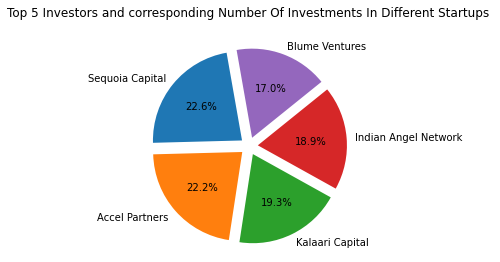

In [18]:
#plot

plt.pie(y, labels = x,startangle=100, shadow = False, explode = (0.1, 0.1, 0.1, 0.1,0.1), autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups \n")
plt.axis("equal")
plt.show()


In [19]:
#pandas frame for Investors name and corresponding Number of Investments made by them in different startups


li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,48
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36


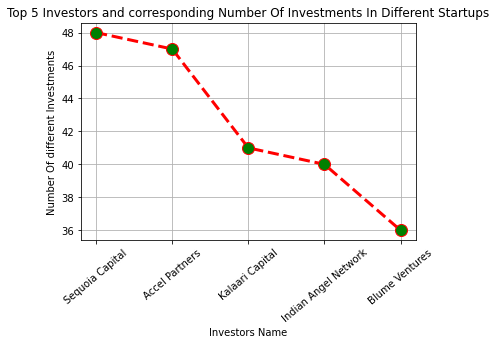

In [20]:
#plot the plot line

plt.plot(x, y, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of different Investments")
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.grid()
plt.show()
